In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import sys
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/Chesta/Downloads/Pima_diabetic/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

## In the data we have some 0 values for the paramteres like Glucose, BloodPresuure,SkinThickness, Insulin which can't be true.
## so would require analysis.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Distributions')

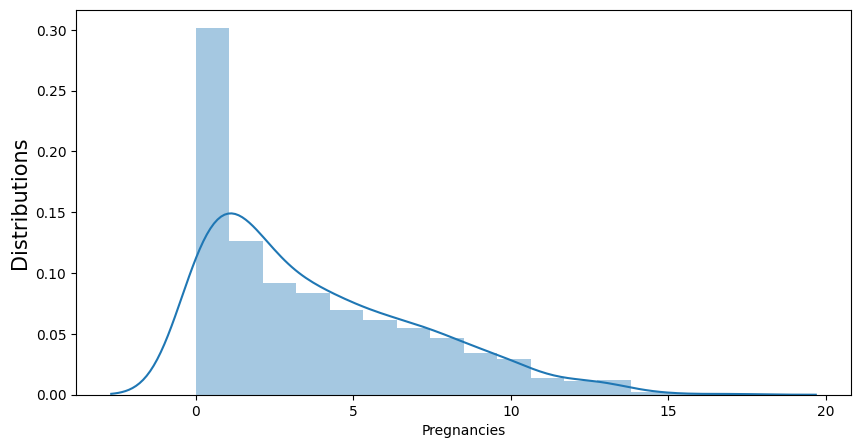

In [6]:
## number of pregnancies
plt.figure(figsize=(10,5))
sns.distplot(data.Pregnancies).set_ylabel("Distributions",fontsize=15)
## thus the distribution is right skewed; heavy tailed towards the end, which is an indication of some outliers. Despite most of the concentrations towards the lower end

In [7]:
## should also look for the distribution in respect to target variable whcih is javing diabities or not
data.Outcome.value_counts()
# 0 means non-diabetic and 1 means diabetic
# percentage outcome of population having diabeties or not

data_length = len(data)
having_diabetic = (len(data[data.Outcome==1])/data_length)*100
print(f'Population in our sample who is diabetic : {round(having_diabetic,2)}%')
non_diabetic = (len(data[data.Outcome==0])/data_length)*100
print(f'Population in our sample who is non-diabetic : {round(non_diabetic,2)}%')

Population in our sample who is diabetic : 34.9%
Population in our sample who is non-diabetic : 65.1%


In [8]:
## define the population proportion function
## these are certain inferences that we are calculating based on population proportion
class Proportion:
    def __init__(self,total_length,n,z):
        self.total_length = total_length
        self.n=n
        self.z=z
        self.proportion_val = round(n/total_length,2)
        ## this will calculate the best estimate

    ## estimated standard error helps to calculate estimate of variability in statistics. Standard Error of a statistics or an estimate of a parameter
    ## This standard error of proportion helps to know that how greatly a sample proportion is likely to differ from the population proportion.
    ## this is the standard error for population proportion.
    ## we won't be sure that above estimate will calculate the exact estimate thus we'll calculate the standard error
    def standard_error(self):
        return np.sqrt((self.proportion_val*(1-self.proportion_val))/self.n)
    ## calculate the margin of error 
    ## the margin of error helps to calculate the amount of random sampling error in the results of a data or survey.
    ## Helps to calculate that by how much percentage points our results would differ from the population value.
    def margin_error(self):
        return self.z*self.standard_error()
    
    def proportion(self):
        lcb = self.proportion_val-(self.z*self.standard_error())
        ucb = self.proportion_val+(self.z*self.standard_error())

        return (lcb,ucb)
    


In [9]:
diabetic = len(data[data.Outcome==1])

In [10]:
diabetic

268

In [11]:
diabetic_pop = Proportion(total_length = data_length,n = diabetic,z=1.96)
print('Estimated value of the prportion of population from the sample having diabetes:',diabetic_pop.proportion_val*100)
print('Estimated Standard Error for proportion of population having diabetes:',diabetic_pop.standard_error())
print("Margin of error for proportion of poulation having diabetes:", diabetic_pop.margin_error())
print("95% Confidence Interval for the people suffering from diabetes are between the range of:",diabetic_pop.proportion())


Estimated value of the prportion of population from the sample having diabetes: 35.0
Estimated Standard Error for proportion of population having diabetes: 0.029135555546701445
Margin of error for proportion of poulation having diabetes: 0.05710568887153483
95% Confidence Interval for the people suffering from diabetes are between the range of: (0.29289431112846515, 0.4071056888715348)


Based on the above we make an inference that what is the population proportion of people are diabetic or non-diabetic.


Specifically using the **Confidence Interval** that helps to to gives an indication that with 95% of our confidence interval will contain the true proportion. 

With the above parameters having 95% confiedence interval we can say that proportion of people having diabetes are between the range of 29% - 41%.

In [12]:
## age bracket for the people having diabetes
data['agegrp'] = pd.cut(data.Age,[20,30,40,50,60,70,80,90])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,agegrp
0,6,148,72,35,0,33.6,0.627,50,1,"(40, 50]"
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 40]"
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 40]"
3,1,89,66,23,94,28.1,0.167,21,0,"(20, 30]"
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 40]"


<AxesSubplot: xlabel='agegrp'>

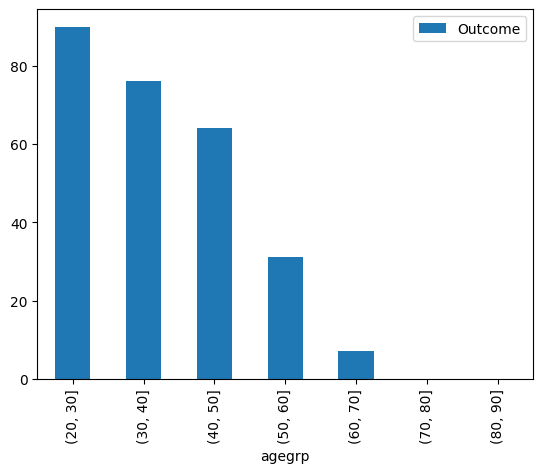

In [13]:
data[data.Outcome==1].groupby(['agegrp'])[['Outcome']].count().plot(kind='bar')

## maximum number of population proportion that lies within the age proup of 20-30 have maximum number of diabetes cases folowed by age group 30-40 an dthen 40-50

In [14]:
##firstly in this we'll replace the 0 values in the columns Glucose, Insulin, SkinThickness, BloodPressure, BMI
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
agegrp                        0
dtype: int64

In [15]:
## here we'll impute the values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(),random_state=0)

data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=imputer.fit_transform(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
agegrp                      0
dtype: int64

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.703906,72.497148,28.662956,154.003047,32.438562,0.471876,33.240885,0.348958
std,3.369578,30.505423,12.164633,9.692718,99.689097,6.890785,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,87.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.465000,130.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,193.232500,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,agegrp
0,6,148.0,72.0,35.00,220.27,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.00,56.06,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,17.32,272.05,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1,"(30, 40]"


In [18]:
agegrp_20_30 = data[data.Outcome==1].groupby(['agegrp'])[['Outcome']].count().reset_index().iloc[0,1]


In [19]:
diabetic_pop_20_30 = Proportion(total_length = diabetic,n = agegrp_20_30,z=1.96)
print('Estimated value of the prportion of population from the sample having diabetes within the age bracket of 20-30:',diabetic_pop_20_30.proportion_val*100)
print('Estimated Standard Error for proportion of population having diabetes within the age bracket of 20-30:',diabetic_pop_20_30.standard_error())
print("Margin of error for proportion of poulation having diabetes within the age bracket of 20-30:", diabetic_pop_20_30.margin_error())
print("95% Confidence Interval for the people suffering from diabetes within the age bracket of 20-30:",diabetic_pop_20_30.proportion())

Estimated value of the prportion of population from the sample having diabetes within the age bracket of 20-30: 34.0
Estimated Standard Error for proportion of population having diabetes within the age bracket of 20-30: 0.04993328882953068
Margin of error for proportion of poulation having diabetes within the age bracket of 20-30: 0.09786924610588013
95% Confidence Interval for the people suffering from diabetes within the age bracket of 20-30: (0.2421307538941199, 0.4378692461058802)


In [20]:
agegrp_30_40 = data[data.Outcome==1].groupby(['agegrp'])[['Outcome']].count().reset_index().iloc[1,1]
diabetic_pop_30_40 = Proportion(total_length = diabetic,n = agegrp_30_40,z=1.96)
print('Estimated value of the prportion of population from the sample having diabetes within the age bracket of 30-40:',diabetic_pop_30_40.proportion_val*100)
print('Estimated Standard Error for proportion of population having diabetes within the age bracket of 30-40:',diabetic_pop_30_40.standard_error())
print("Margin of error for proportion of poulation having diabetes within the age bracket of 30-40:", diabetic_pop_30_40.margin_error())
print("95% Confidence Interval for the people suffering from diabetes within the age bracket of 30-40:",diabetic_pop_30_40.proportion())

Estimated value of the prportion of population from the sample having diabetes within the age bracket of 30-40: 28.000000000000004
Estimated Standard Error for proportion of population having diabetes within the age bracket of 30-40: 0.05150370451673713
Margin of error for proportion of poulation having diabetes within the age bracket of 30-40: 0.10094726085280477
95% Confidence Interval for the people suffering from diabetes within the age bracket of 30-40: (0.17905273914719527, 0.3809472608528048)


In [21]:
agegrp_40_50 = data[data.Outcome==1].groupby(['agegrp'])[['Outcome']].count().reset_index().iloc[2,1]
diabetic_pop_40_50 = Proportion(total_length = diabetic,n = agegrp_40_50,z=1.96)
print('Estimated value of the prportion of population from the sample having diabetes within the age bracket of 40-50:',diabetic_pop_40_50.proportion_val*100)
print('Estimated Standard Error for proportion of population having diabetes within the age bracket of 40-50:',diabetic_pop_40_50.standard_error())
print("Margin of error for proportion of poulation having diabetes within the age bracket of 40-50:", diabetic_pop_40_50.margin_error())
print("95% Confidence Interval for the people suffering from diabetes within the age bracket of 40-50:",diabetic_pop_40_50.proportion())

Estimated value of the prportion of population from the sample having diabetes within the age bracket of 40-50: 24.0
Estimated Standard Error for proportion of population having diabetes within the age bracket of 40-50: 0.05338539126015656
Margin of error for proportion of poulation having diabetes within the age bracket of 40-50: 0.10463536686990686
95% Confidence Interval for the people suffering from diabetes within the age bracket of 40-50: (0.13536463313009311, 0.34463536686990687)


In [22]:
## What is the proportion of females who are diabetic and  pregnant?
diabetic_preg = data[(data.Pregnancies!=0) & (data.Outcome==1)]

In [23]:
## estimated female population proportion who are diabetic and also pregnant from the whole population
estimated_female_preg = len(diabetic_preg)
diabetic_pop_preg = Proportion(total_length=data_length,n =estimated_female_preg,z=1.96 )
print('Estimated value of the female prportion of population from the sample having diabetes and pregnant out of total samples:',diabetic_pop_preg.proportion_val*100)
print('Estimated Standard Error for proportion of female population having diabetes and are pregnant out of total samples::',diabetic_pop_preg.standard_error())
print("Margin of error for proportion of female population having diabetes and are pregnant out of total samples:", diabetic_pop_preg.margin_error())
print("95% Confidence Interval for the females suffering from diabetes and are pregnant out of total sample:",diabetic_pop_preg.proportion())

Estimated value of the female prportion of population from the sample having diabetes and pregnant out of total samples: 30.0
Estimated Standard Error for proportion of female population having diabetes and are pregnant out of total samples:: 0.030216609311120093
Margin of error for proportion of female population having diabetes and are pregnant out of total samples: 0.059224554249795384
95% Confidence Interval for the females suffering from diabetes and are pregnant out of total sample: (0.2407754457502046, 0.3592245542497954)


In [24]:
nondiabetic_preg = data[(data.Pregnancies==0) & (data.Outcome==1)]

<AxesSubplot: xlabel='agegrp', ylabel='Glucose'>

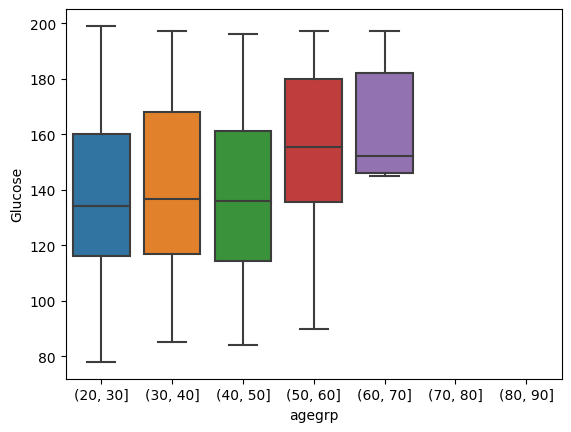

In [25]:
## females who are diabetic and pregnant what is their average Glucose level
## is it different from those females who are not-pregnant but are diabetic
sns.boxplot(x= diabetic_preg.agegrp,y=diabetic_preg.Glucose)


<AxesSubplot: xlabel='agegrp', ylabel='Glucose'>

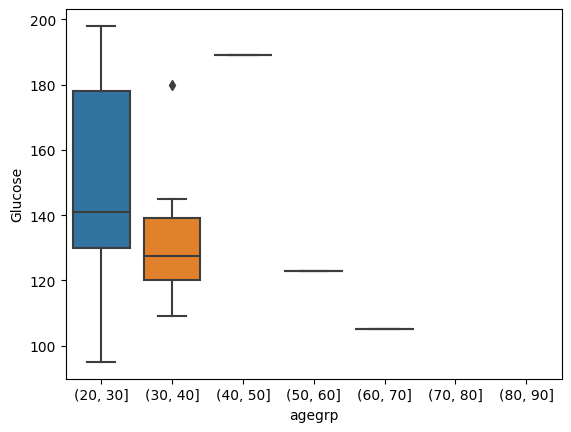

In [26]:
sns.boxplot(x= nondiabetic_preg.agegrp,y=nondiabetic_preg.Glucose)

Research question 

is the glucose level is same among the female population who are pregnant and those who are not?

reframe the question 

Is there a significant difference between the bmi of pregnant and non-pregnant women? 

Compare the level of glucose bewteen pregnant and non-pregnant women suffering from diabetes?

In [27]:
from scipy import stats 
from sklearn.model_selection import train_test_split

In [28]:
preg_diabetic_bmi = diabetic_preg.iloc[:,2]
nonpreg_diabetic_bmi = nondiabetic_preg.iloc[:,2]

In [29]:
a_1, a_2 = train_test_split(preg_diabetic_bmi, test_size=0.4, random_state=0)
b_1, b_2 = train_test_split(nonpreg_diabetic_bmi, test_size=0.4, random_state=1)

In [30]:
mu1 = np.mean(a_1)
 
mu2 = np.mean(b_1)
 
np.std(a_1)
 
np.std(b_1)

14.771407976054327

In [31]:
stats.ttest_ind(a_1, b_1, equal_var = False)

Ttest_indResult(statistic=-0.4324866283614341, pvalue=0.6689663857284428)

In [32]:
## what is the average glucose concentration level of the females who are pregnant and also suffering from diabetes.

## define the class to find the avg value of variable
class Average_pop:
    def __init__(self,column,z) :
        self.column =column
        self.z=z
        self.mean = self.column.mean()
        self.std = self.column.std()
    
    def margin_of_error(self):
        return self.z*self.std/np.sqrt(len(self.column))
    
    def intervals(self):
        lcb = self.mean - self.margin_of_error()
        ucb = self.mean + self.margin_of_error()

        return (round(lcb,2),round(ucb,2))
    



In [33]:
## find the avergae glucose concentration level among females who are pregnant nad suffering from diabetes

mean_glucose = Average_pop(diabetic_preg.Glucose,1.96)
print("The mean of glucose concentration level for pregnant fenales having diabetes: ",round(mean_glucose.mean,2))
print("The standard deviation of it is: ",round(mean_glucose.std,2))
print("With 95% of confidence interval we can say that females who are pregnant and suffering from diabetes the average glucose level lies in between the range of :",(mean_glucose.intervals()))

The mean of glucose concentration level for pregnant fenales having diabetes:  141.98
The standard deviation of it is:  29.82
With 95% of confidence interval we can say that females who are pregnant and suffering from diabetes the average glucose level lies in between the range of : (138.12, 145.83)


In [34]:
# average glucose concenteration level among females not-pregnnat and suffering from diabetes
mean_glucose_non_diabetic = Average_pop(nondiabetic_preg.Glucose,1.96)
print("The mean of glucose concentration level for females who are not pregnant & having diabetes: ",round(mean_glucose_non_diabetic.mean,2))
print("The standard deviation of it is: ",round(mean_glucose_non_diabetic.std,2))
print("With 95% of confidence interval we can say that females who are not pregnant and suffering from diabetes, the average glucose level lies in between the range of :",(mean_glucose_non_diabetic.intervals()))


The mean of glucose concentration level for females who are not pregnant & having diabetes:  144.24
The standard deviation of it is:  28.41
With 95% of confidence interval we can say that females who are not pregnant and suffering from diabetes, the average glucose level lies in between the range of : (135.2, 153.27)


In [35]:
diabetic_preg

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,agegrp
0,6,148.0,72.0,35.00,220.27,33.600,0.627,50,1,"(40, 50]"
2,8,183.0,64.0,17.32,272.05,23.300,0.672,32,1,"(30, 40]"
6,3,78.0,50.0,32.00,88.00,31.000,0.248,26,1,"(20, 30]"
8,2,197.0,70.0,45.00,543.00,30.500,0.158,53,1,"(50, 60]"
9,8,125.0,96.0,28.47,159.63,33.364,0.232,54,1,"(50, 60]"
...,...,...,...,...,...,...,...,...,...,...
754,8,154.0,78.0,32.00,153.89,32.400,0.443,45,1,"(40, 50]"
755,1,128.0,88.0,39.00,110.00,36.500,1.057,37,1,"(30, 40]"
759,6,190.0,92.0,31.42,327.13,35.500,0.278,66,1,"(60, 70]"
761,9,170.0,74.0,31.00,246.17,44.000,0.403,43,1,"(40, 50]"


In [36]:
diabetes_data=data[data.Outcome==1]
nondiabetes_data = data[data.Outcome==0]

In [37]:
data.head()
## Find out the Blood Pressure in respect to the Outcome. How much average difference we'll able to observe
## how much variance we are observing among the different age grpups for the average blood pressure
## With this two sampled t-test would be conducted.
## Null hypothesis is means are equal 
## Alternate is means are not equal
stats.ttest_ind(diabetes_data.BloodPressure,nondiabetes_data.BloodPressure)

Ttest_indResult(statistic=4.911967264136734, pvalue=1.102797149571242e-06)

<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

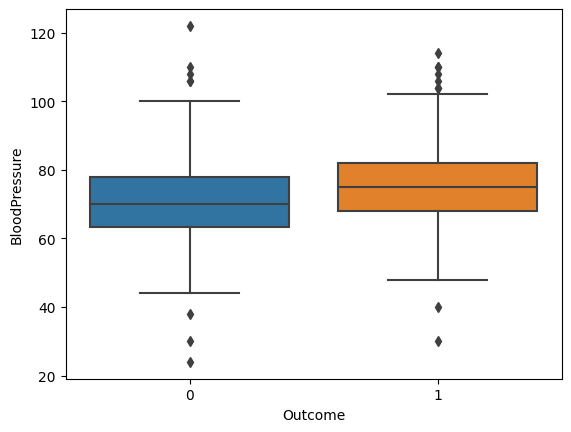

In [38]:
sns.boxplot(x=data.Outcome, y =data.BloodPressure)

In [39]:
## the glucose concenteration level is quite significant between the diabetic and non-diabetic groups as the p value is way more less than the significance level 0f 0.05
stats.ttest_ind(diabetes_data.Glucose,nondiabetes_data.Glucose)

Ttest_indResult(statistic=15.746966606322744, pvalue=1.3069880181170106e-48)

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

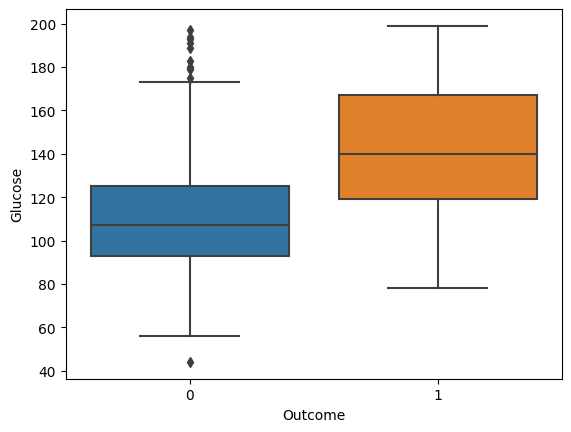

In [40]:
sns.boxplot(x=data.Outcome, y =data.Glucose)

In [41]:
## let's find out by how much 
## find the avergae glucose concentration level among diabetic 
mean_glucose_diab = Average_pop(diabetes_data.Glucose,1.96)
print("The mean of glucose concentration level for patients who have diabetes: ",round(mean_glucose_diab.mean,2))
print("The standard deviation of it is: ",round(mean_glucose_diab.std,2))
print("With 95% of confidence interval we can say that average glucose concentration for the patients suffering from diabetes are :",(mean_glucose_diab.intervals()))

The mean of glucose concentration level for patients who have diabetes:  142.3
The standard deviation of it is:  29.58
With 95% of confidence interval we can say that average glucose concentration for the patients suffering from diabetes are : (138.75, 145.84)


In [42]:
## average concentration of glucose level for nondiabetic patients are
mean_glucose_nondiab = Average_pop(nondiabetes_data.Glucose,1.96)
print("The mean of glucose concentration level for those who are non-diabetic: ",round(mean_glucose_nondiab.mean,2))
print("The standard deviation of it is: ",round(mean_glucose_nondiab.std,2))
print("With 95% of confidence interval we can say that average glucose concentration for nondiabetic population is:",(mean_glucose_nondiab.intervals()))

The mean of glucose concentration level for those who are non-diabetic:  110.67
The standard deviation of it is:  24.74
With 95% of confidence interval we can say that average glucose concentration for nondiabetic population is: (108.5, 112.84)


<AxesSubplot: xlabel='agegrp', ylabel='Glucose'>

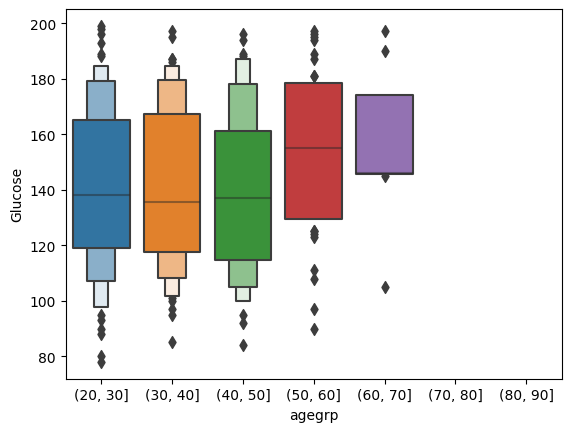

In [43]:
sns.boxenplot(x= diabetes_data.agegrp,y=diabetes_data.Glucose)

In [44]:
var_data = diabetes_data.groupby('agegrp')['Glucose']

In [45]:
import scipy.stats as ss
dict_1 = {}
for i,j in var_data:
    # print(i)
   
    dict_1[i]=j.values
    # ss.f_oneway(*samples)


In [46]:
data_anova=pd.DataFrame.from_dict(dict_1,orient='index').T
data_anova = data_anova.iloc[:,:5]
data_anova.fillna(0,inplace=True)
data_anova

,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
0,78.0,183.0,148.0,197.0,146.0
1,119.0,137.0,196.0,125.0,105.0
2,158.0,168.0,125.0,189.0,158.0
3,90.0,100.0,147.0,166.0,146.0
4,180.0,118.0,102.0,143.0,197.0
...,...,...,...,...,...
85,120.0,0.0,0.0,0.0,0.0
86,174.0,0.0,0.0,0.0,0.0
87,147.0,0.0,0.0,0.0,0.0
88,136.0,0.0,0.0,0.0,0.0


In [47]:
data_anova.columns = ['(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]']

In [48]:
ss.f_oneway(data_anova['(20, 30]'],data_anova['(30, 40]'],data_anova['(40, 50]'],data_anova['(50, 60]'],data_anova['(60, 70]'])

## with this we can say that there is significant difference between glucose concenteration for each agegrp suffering from diabetes
## since p value is less than the threshold or the significance level we do have suffiecient proof to reject the null hypothesis and comes on the conclusion that there is difference among the agegrpups
## with glucose level who are diabetic patient

F_onewayResult(statistic=74.08227806164737, pvalue=4.331035155336049e-48)

In [49]:
data_anova2 = data_anova.melt()

In [50]:
data_anova2

,variable,value
0,"(20, 30]",78.0
1,"(20, 30]",119.0
2,"(20, 30]",158.0
3,"(20, 30]",90.0
4,"(20, 30]",180.0
...,...,...
445,"(60, 70]",0.0
446,"(60, 70]",0.0
447,"(60, 70]",0.0
448,"(60, 70]",0.0


In [51]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(endog = data_anova2.value,groups=data_anova2.variable,alpha=0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower     upper   reject
-------------------------------------------------------------
(20, 30] (30, 40]  -21.0967 0.0987  -44.4655    2.2722  False
(20, 30] (40, 50]   -41.078    0.0  -64.4469  -17.7091   True
(20, 30] (50, 60]  -87.4667    0.0 -110.8355  -64.0978   True
(20, 30] (60, 70] -128.2444    0.0 -151.6133 -104.8756   True
(30, 40] (40, 50]  -19.9813 0.1337  -43.3502    3.3875  False
(30, 40] (50, 60]    -66.37    0.0  -89.7389  -43.0011   True
(30, 40] (60, 70] -107.1478    0.0 -130.5167  -83.7789   True
(40, 50] (50, 60]  -46.3887    0.0  -69.7575  -23.0198   True
(40, 50] (60, 70]  -87.1664    0.0 -110.5353  -63.7976   True
(50, 60] (60, 70]  -40.7778    0.0  -64.1467  -17.4089   True
-------------------------------------------------------------


In [52]:
data.groupby(['Outcome']).agg('mean')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.666640,70.941880,26.774360,128.178080,30.867872,0.429734,31.190000
1,4.865672,142.295821,75.398769,32.186455,202.183955,35.368955,0.550500,37.067164


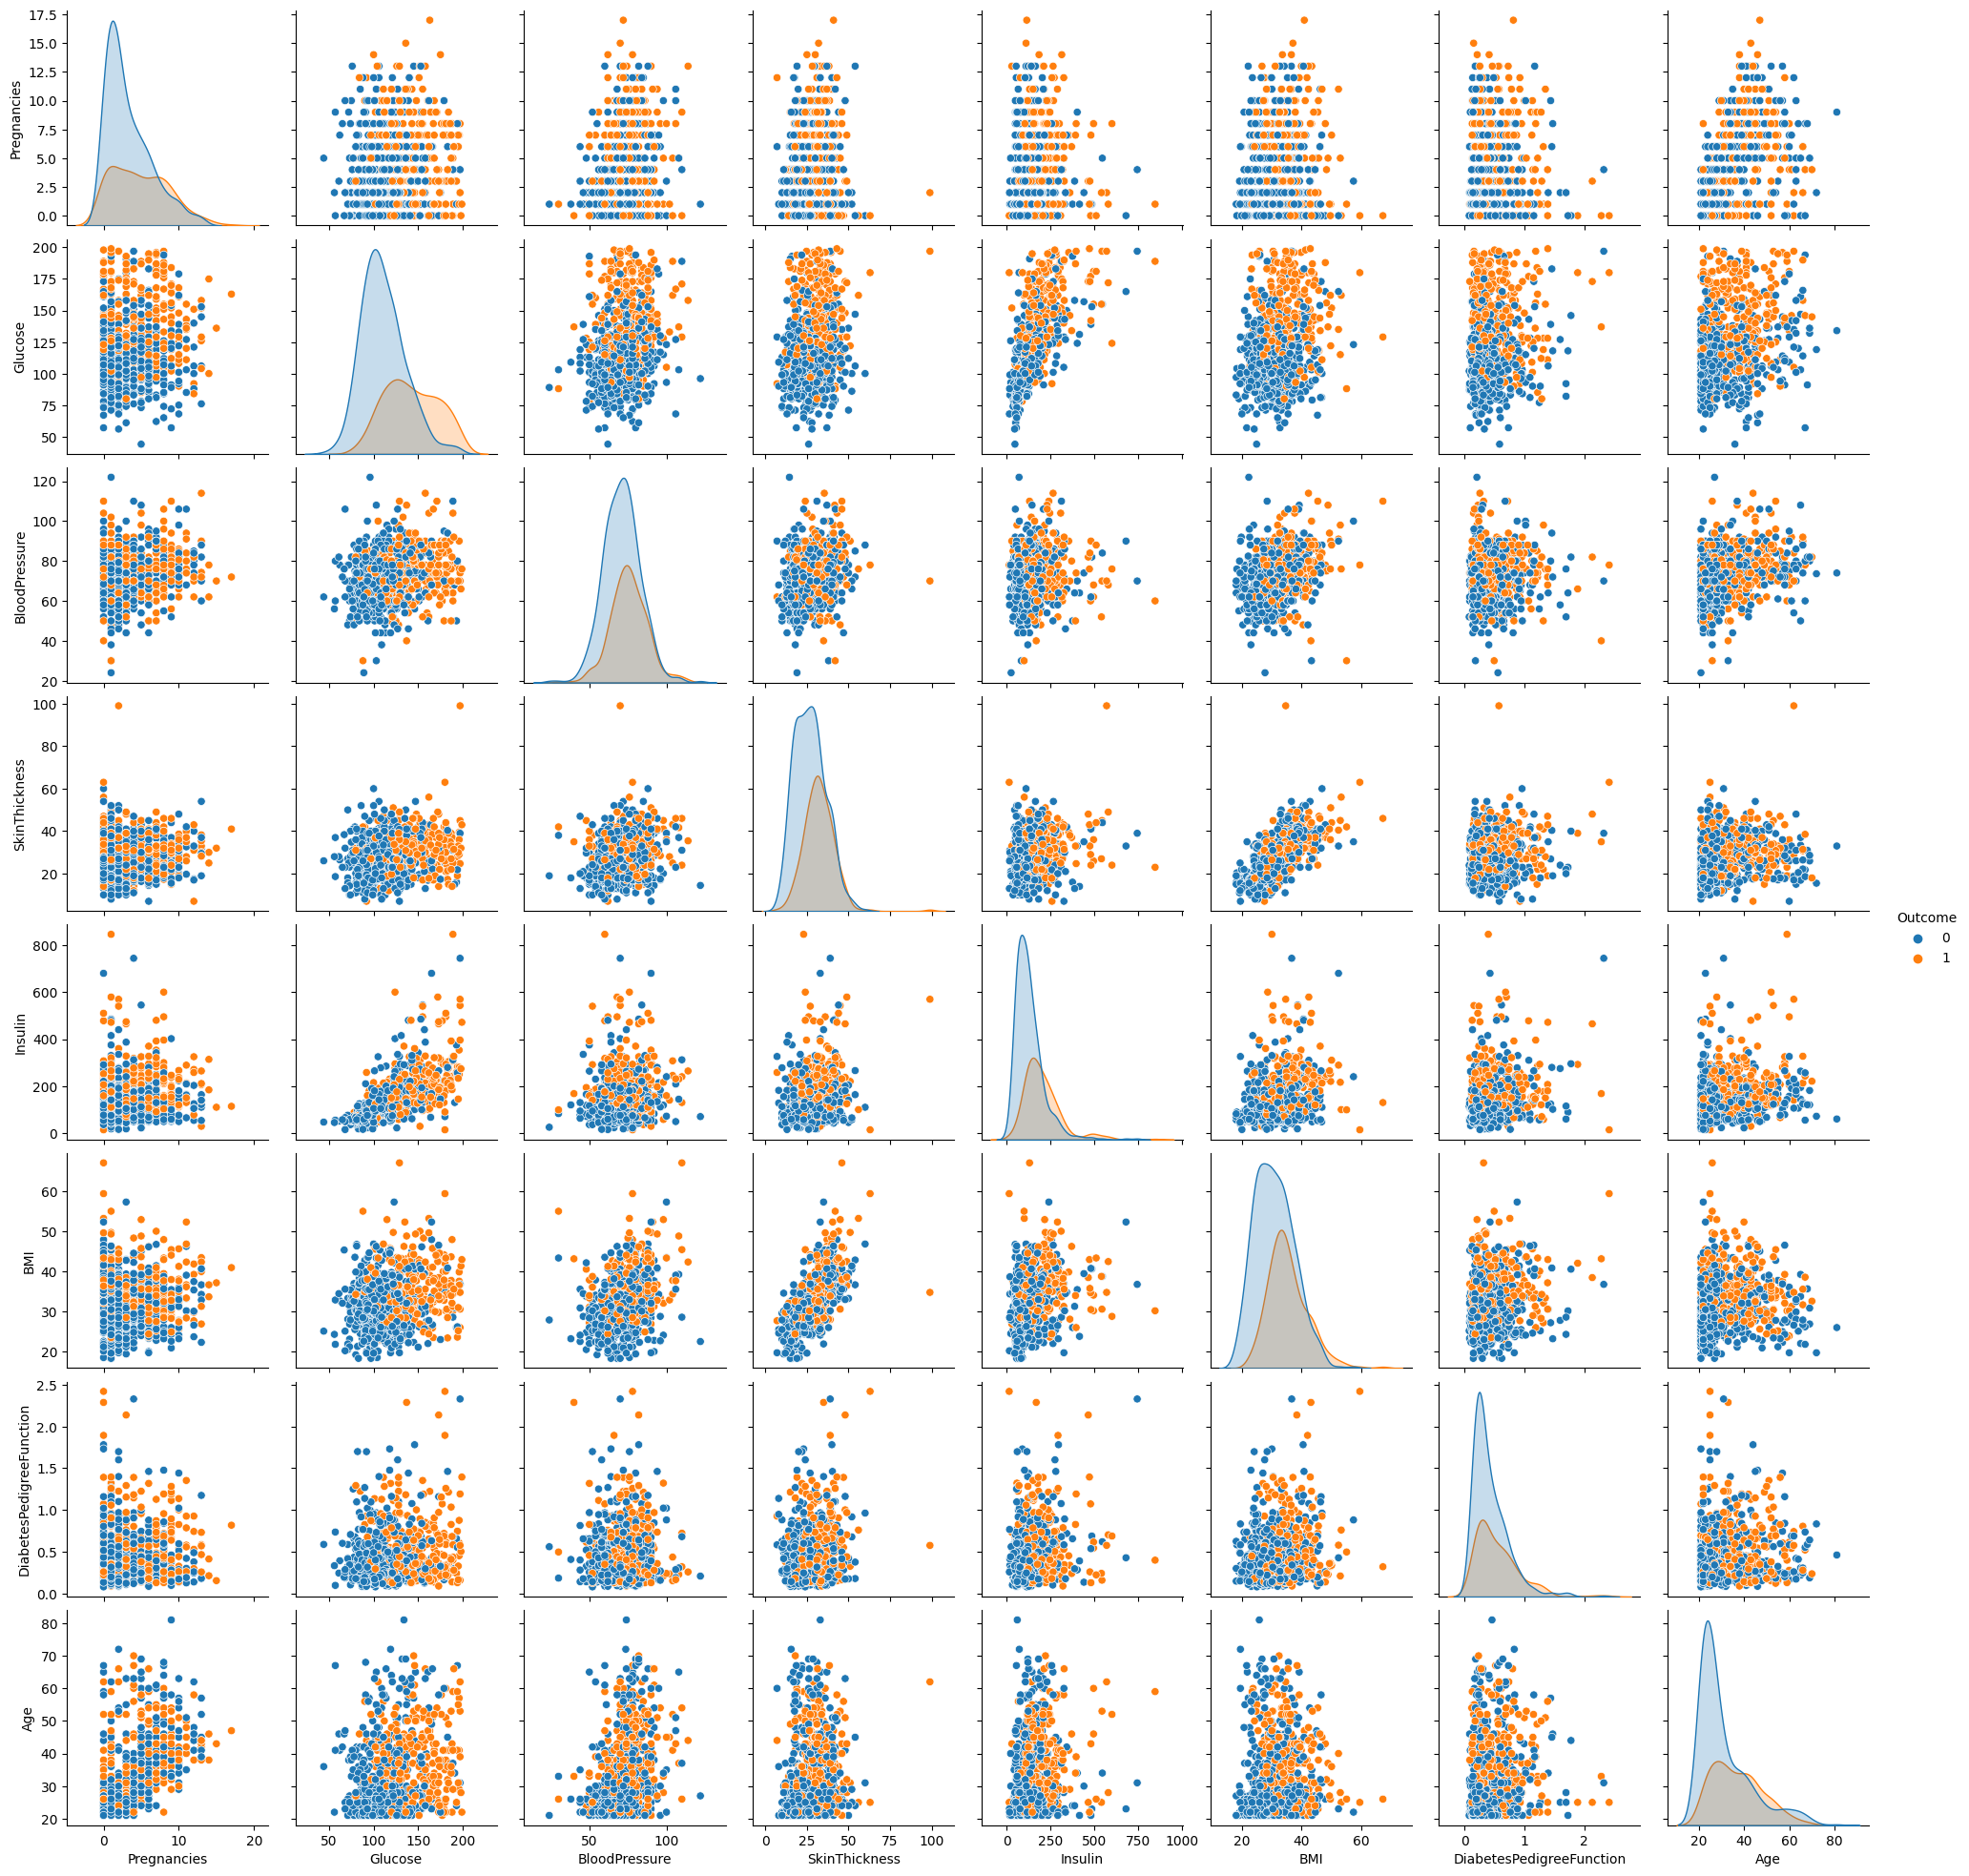

In [53]:
sns.pairplot(data,hue="Outcome")

<AxesSubplot: xlabel='agegrp', ylabel='Insulin'>

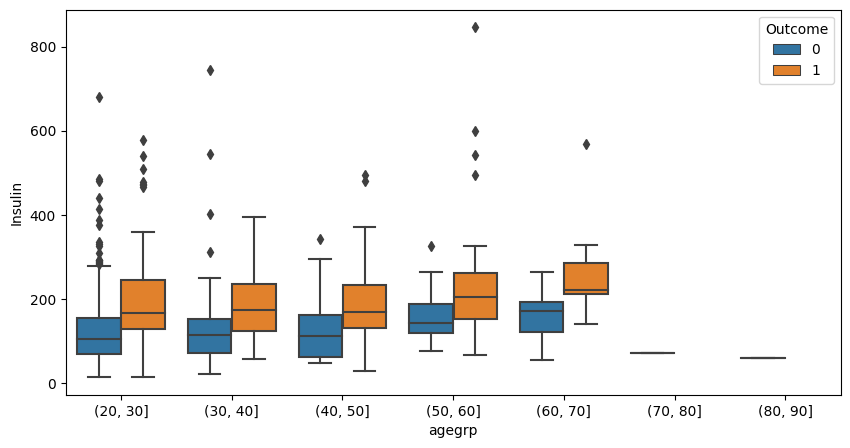

In [54]:
## look out on how the insulin be impacted via age group and the outcome
plt.figure(figsize=(10,5))
sns.boxplot(x=data.agegrp,y=data.Insulin,hue=data.Outcome)

## with this we observe that data is postively skewed where the outliers are find in insulin level specifically for the age bracket 20-30 and both for the diabetic and non-diabetic.
## with this try to find out what leads to an increase level of insultin among non-diabetic patients.

In [55]:
## find out the average insulin
data.groupby(['Outcome','agegrp']).agg('mean')['Insulin']

Outcome  agegrp  
0        (20, 30]    123.449633
         (30, 40]    135.106420
         (40, 50]    124.078980
         (50, 60]    157.046957
         (60, 70]    164.099444
         (70, 80]     71.650000
         (80, 90]     60.000000
1        (20, 30]    198.651111
         (30, 40]    187.301579
         (40, 50]    193.951562
         (50, 60]    249.564839
         (60, 70]    274.624286
         (70, 80]           NaN
         (80, 90]           NaN
Name: Insulin, dtype: float64

In [56]:
pd.set_option('display.max_rows', None)
data.groupby(['Outcome','agegrp'])[['Insulin']].quantile([0.25,0.50,0.75,0.95,0.99]).dropna()

Insulin
Outcome agegrp                 
0       (20, 30] 0.25   70.0000
                 0.50  105.0000
                 0.75  153.9850
                 0.95  282.2000
                 0.99  433.5000
        (30, 40] 0.25   72.0000
                 0.50  115.0000
                 0.75  152.2700
                 0.95  250.2900
                 0.99  584.8000
        (40, 50] 0.25   61.5800
                 0.50  113.1100
                 0.75  161.9800
                 0.95  248.9760
                 0.99  319.5312
        (50, 60] 0.25  119.2900
                 0.50  143.1300
                 0.75  186.8900
                 0.95  260.3600
                 0.99  312.5800
        (60, 70] 0.25  121.6975
                 0.50  171.6250
                 0.75  193.0375
                 0.95  257.5345
                 0.99  262.4509
        (70, 80] 0.25   71.6500
                 0.50   71.6500
                 0.75   71.6500
                 0.95   71.6500
                 0.99   71.6500
        (80, 90] 0.25   60.0000
                 0.50   60.0000
                 0.75   60.0000
                 0.95   60.0000
                 0.99   60.0000
1       (20, 30] 0.25  128.6025
                 0.50  167.6800
                 0.75  245.3100
                 0.95  472.9065
                 0.99  544.2900
        (30, 40] 0.25  124.9000
                 0.50  173.0000
                 0.75  236.0425
                 0.95  320.4150
                 0.99  392.9400
        (40, 50] 0.25  132.1350
                 0.50  169.6550
                 0.75  232.7350
                 0.95  346.4715
                 0.99  485.5500
        (50, 60] 0.25  153.0000
                 0.50  205.7300
                 0.75  262.9050
                 0.95  571.5000
                 0.99  772.2000
        (60, 70] 0.25  210.8650
                 0.50  220.7700
                 0.75  284.8850
                 0.95  496.8030
                 0.99  554.9766

In [57]:
data[(data.Outcome==0) & (data.Insulin>100) & (data.Age.between(20,30,inclusive=True))]

## so in this we can suggest that the higher insulin can leads to a deterioration of health in coming future. Thus we need to keep a check on these patients.
## Secondly we can look for the other important paarmeter which is Glucose level as we have ssen above the average Glucose concenteration for non-diabetic is somewhere 109 and the range is from 107-112 approx.
## so we surely need to check on those patients whose Glucose concenmtration is also quite high.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,agegrp
5,5,116.00,74.00,16.32,111.12,25.600,0.201,30,0,"(20, 30]"
7,10,115.00,75.13,33.17,167.21,35.300,0.134,29,0,"(20, 30]"
10,4,110.00,92.00,41.24,159.04,37.600,0.191,30,0,"(20, 30]"
20,3,126.00,88.00,41.00,235.00,39.300,0.704,27,0,"(20, 30]"
27,1,97.00,66.00,15.00,140.00,23.200,0.487,22,0,"(20, 30]"
46,1,146.00,56.00,29.07,193.93,29.700,0.564,29,0,"(20, 30]"
49,7,105.00,76.74,36.61,149.77,41.383,0.305,24,0,"(20, 30]"
59,0,105.00,64.00,41.00,142.00,41.500,0.173,22,0,"(20, 30]"
63,2,141.00,58.00,34.00,128.00,25.400,0.699,24,0,"(20, 30]"
71,5,139.00,64.00,35.00,140.00,28.600,0.411,26,0,"(20, 30]"


In [58]:
mean_insulin_non_diabetic = Average_pop(nondiabetes_data.Insulin,1.96)
print("The mean of Insulin concentration level for those who are non-diabetic: ",round(mean_insulin_non_diabetic.mean,2))
print("The standard deviation of it is: ",round(mean_insulin_non_diabetic.std,2))
print("With 95% of confidence interval we can say that insulin concentration falls within the range of :",(mean_insulin_non_diabetic.intervals()))


The mean of Insulin concentration level for those who are non-diabetic:  128.18
The standard deviation of it is:  84.3
With 95% of confidence interval we can say that insulin concentration falls within the range of : (120.79, 135.57)


<AxesSubplot: xlabel='Insulin', ylabel='Glucose'>

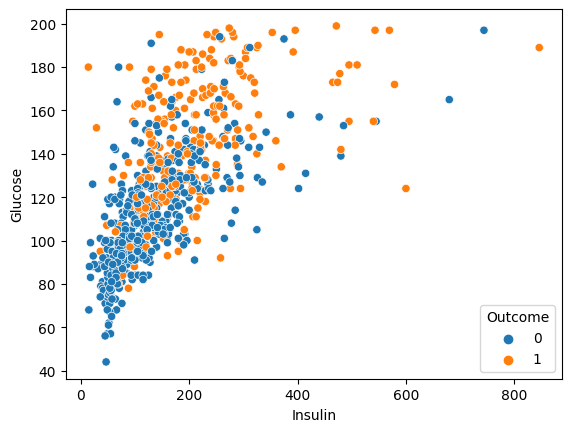

In [59]:
sns.scatterplot(x=data.Insulin,y= data.Glucose,hue=data.Outcome)

<AxesSubplot: xlabel='Insulin', ylabel='Glucose'>

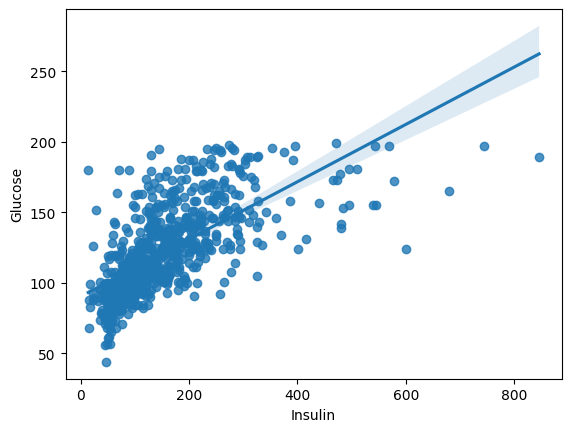

In [60]:
sns.regplot(x=data.Insulin,y=data.Glucose)

<AxesSubplot: >

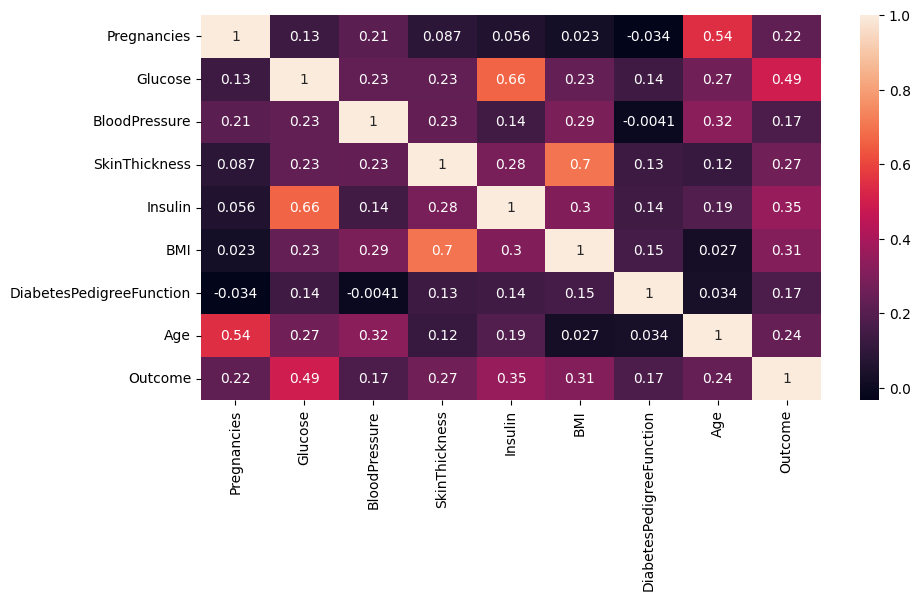

In [61]:
plt.figure(figsize=(10,5))
corr = (data.corr())
sns.heatmap(corr,annot=True)

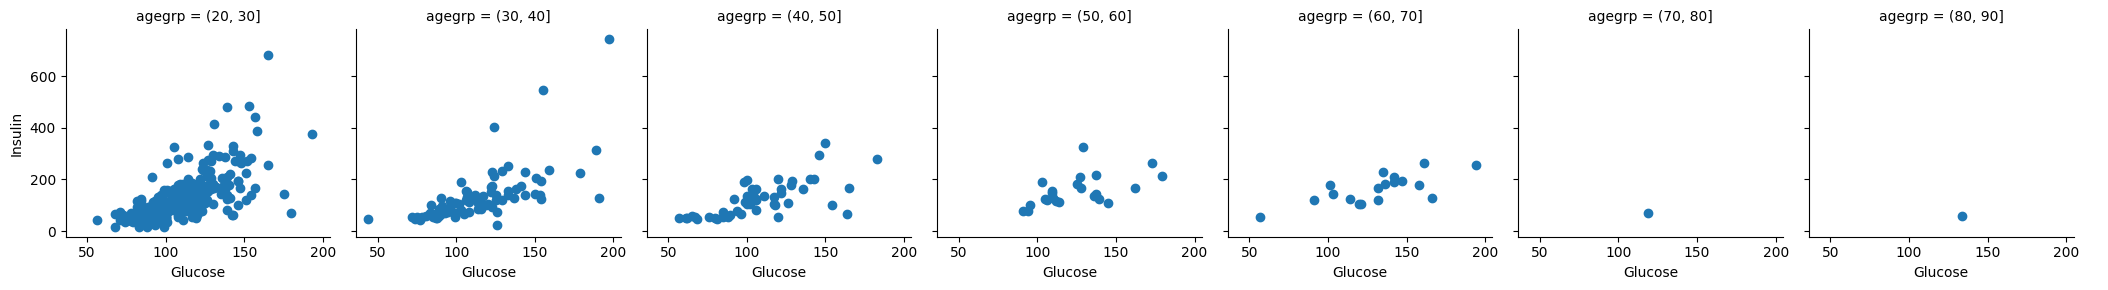

In [62]:
sns.FacetGrid(data=nondiabetes_data,col="agegrp").map(plt.scatter,'Glucose','Insulin').add_legend()

In [64]:
data.groupby('agegrp').corr().dropna()

Pregnancies   Glucose  BloodPressure  \
agegrp                                                                    
(20, 30] Pregnancies                  1.000000 -0.030475       0.045953   
         Glucose                     -0.030475  1.000000       0.207852   
         BloodPressure                0.045953  0.207852       1.000000   
         SkinThickness               -0.029725  0.290640       0.202193   
         Insulin                     -0.051872  0.689914       0.158396   
         BMI                         -0.080587  0.327219       0.286064   
         DiabetesPedigreeFunction    -0.127981  0.177115      -0.028523   
         Age                          0.398027  0.158626       0.193504   
         Outcome                      0.066158  0.491237       0.102584   
(30, 40] Pregnancies                  1.000000  0.033361      -0.007302   
         Glucose                      0.033361  1.000000       0.077543   
         BloodPressure               -0.007302  0.077543       1.000000   
         SkinThickness                0.027551  0.091382       0.283607   
         Insulin                      0.067207  0.662829       0.060580   
         BMI                         -0.039914  0.147725       0.297735   
         DiabetesPedigreeFunction    -0.124149  0.075603      -0.022647   
         Age                          0.303995  0.073669       0.132100   
         Outcome                     -0.003260  0.424244       0.052537   
(40, 50] Pregnancies                  1.000000 -0.016992      -0.051163   
         Glucose                     -0.016992  1.000000       0.191623   
         BloodPressure               -0.051163  0.191623       1.000000   
         SkinThickness               -0.023664  0.133753       0.139844   
         Insulin                     -0.062501  0.633496       0.101620   
         BMI                         -0.030713  0.147751       0.199032   
         DiabetesPedigreeFunction    -0.008948  0.106778       0.005732   
         Age                          0.063291  0.059752       0.152718   
         Outcome                      0.139615  0.480823       0.061831   
(50, 60] Pregnancies                  1.000000 -0.115110       0.194621   
         Glucose                     -0.115110  1.000000       0.119298   
         BloodPressure                0.194621  0.119298       1.000000   
         SkinThickness                0.069780  0.093673       0.228290   
         Insulin                     -0.236287  0.477387      -0.170224   
         BMI                         -0.035667  0.132966       0.385432   
         DiabetesPedigreeFunction    -0.024487  0.035482      -0.017377   
         Age                         -0.067434  0.010777      -0.228304   
         Outcome                     -0.068046  0.460074       0.092788   
(60, 70] Pregnancies                  1.000000 -0.026891       0.265267   
         Glucose                     -0.026891  1.000000      -0.037486   
         BloodPressure                0.265267 -0.037486       1.000000   
         SkinThickness               -0.050217  0.281284       0.075069   
         Insulin                     -0.246626  0.741327      -0.116479   
         BMI                          0.146936  0.142898       0.578144   
         DiabetesPedigreeFunction    -0.390777 -0.116664      -0.151616   
         Age                          0.007246 -0.052117       0.187526   
         Outcome                     -0.345238  0.346478       0.297420   

                                   SkinThickness   Insulin       BMI  \
agegrp                                                                 
(20, 30] Pregnancies                   -0.029725 -0.051872 -0.080587   
         Glucose                        0.290640  0.689914  0.327219   
         BloodPressure                  0.202193  0.158396  0.286064   
         SkinThickness                  1.000000  0.302159  0.741507   
         Insulin                        0.302159  1.000000  0.355852   
     

To make the predictions firstly there is need to deal with the outliers

In this we'll be using the IsolationForest methodology to find the anomalies in the data we have

In [65]:
data2 = data.copy()

In [111]:
# data2.iloc[:,:9]

In [77]:
## deal with the outliers using the IsolationForest
# data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100,random_state=0)
y_pred = clf.fit_predict(data2.iloc[:,:9])

In [88]:
data2['Outliers'] =y_pred

In [93]:
data2 = data2[~(data2.Outliers==-1)]

In [95]:
data2.reset_index(drop=True,inplace=True)

In [99]:
## Split the dataset into train and test

X_data = data2.drop(['Outcome','Outliers','agegrp'],axis=1)
y = data2.Outcome

In [100]:
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00,220.27,33.6,0.627,50
1,1,85.0,66.0,29.00,56.06,26.6,0.351,31
2,1,89.0,66.0,23.00,94.00,28.1,0.167,21
3,5,116.0,74.0,16.32,111.12,25.6,0.201,30
4,3,78.0,50.0,32.00,88.00,31.0,0.248,26


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

In [101]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

In [102]:
X_train,X_test, y_train, y_test = train_test_split(X_data,y,random_state=12, test_size=0.25)

In [103]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(485, 8)
(485,)
(162, 8)
(162,)


In [104]:
model = svm.SVC(kernel='sigmoid')
model.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [105]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.4876543209876543


In [108]:
for k in ('linear','sigmoid','poly','rbf'):
    model = svm.SVC(kernel=k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(k)
    print(accuracy_score(y_test,y_pred))

linear
0.7901234567901234
sigmoid
0.4876543209876543
poly
0.7839506172839507
rbf
0.7962962962962963


In [109]:
final_model = svm.SVC(kernel='rbf')
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       118
           1       0.69      0.45      0.55        44

    accuracy                           0.80       162
   macro avg       0.75      0.69      0.71       162
weighted avg       0.78      0.80      0.78       162



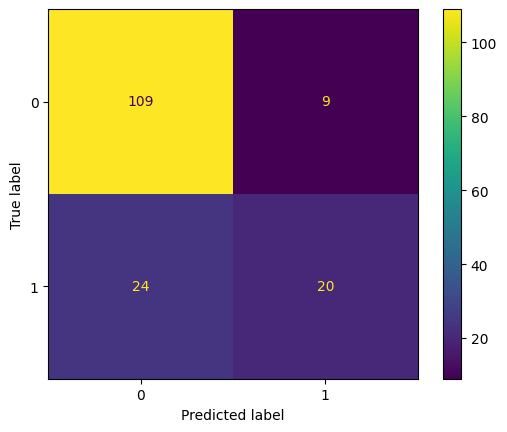

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels= final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= final_model.classes_)
disp.plot()
plt.show()